# Projet de maths-info
###### Par Narjis EL AMRAOUI et Rania FATHI


In [98]:
import autograd
import autograd.numpy as np
import matplotlib.pyplot as plt
from math import sqrt, sin, cos, exp

In [99]:
def find_seed(g, x=0, c=0, n=0, eps=2**(-26)):
    " Find_seed qui recherche une graine à x fixé entre y=n et y=n+1"
    if (c>g(x,n+1) and c>g(x,n)) or (c<g(x,n+1) and c<g(x,n)):
        return None
    def f(t): 
        return g(x,t)-c
    def dichotomie(f):
        a=n
        b=n+1
        while (b-a)/2 > eps and f(a)*f(b) <= 0:
            m=(a+b)/2
            if f(a)*f(m)<=0: 
                b=m
            else: 
                a=m
        return (a+b)/2
    return dichotomie(f) 



# Première méthode: 
## Avec l'orthogonal du gradient et Newton R²->R

In [102]:
"""Premier essai: On a testé la méthode qui consiste à calculer l'orthogonal du gradient pour suivre la ligne de niveau
en essayant de limiter l'erreur avec la méthode de Newton """


def ortho_grad(f, x, y):
    """Fonction qui calcule l'orthogonal du gradient dans les deux sens possibles"""
    g = autograd.grad
    if sqrt(g(f,0)(x,y)**2+g(f,1)(x,y)**2)==0:
        return np.r_[-g(f,1)(x,y), g(f,0)(x,y)]
    tang_1 = np.r_[-g(f,1)(x,y), g(f,0)(x,y)]/sqrt(g(f,1)(x,y)**2 + g(f,0)(x,y)**2)
    tang_2 = np.r_[g(f,1)(x,y), -g(f,0)(x,y)]/sqrt(g(f,1)(x,y)**2 + g(f,0)(x,y)**2)
    return tang_1, tang_2


def grad(f,x,y):
    """Fonction qui calcule le gradient pour l'utiliser dans la méthode de Newton (R² -> R)"""
    g = autograd.grad
    if sqrt(g(f,1)(x,y)**2 + g(f,0)(x,y)**2)==0:
        return np.r_[-g(f,1)(x,y), g(f,0)(x,y)]
    return np.r_[g(f,0)(x,y), g(f,1)(x,y)]/sqrt(g(f,0)(x,y)**2 + g(f,1)(x,y)**2)

def norme(X):
    x, y = X[0], X[1]
    return sqrt(x**2 + y**2)

def Newton_grad(f, xo, yo, c=0):
    """La fonction à annuler est f(x,y)-c en partant du point (xo,yo) calculé avec l'orthogonal du gradient distant de delta
    par rapport au dernier point trouvé sur la ligne de niveau"""
    def F(X):
        """Fonction qui calcule le prochain terme de la suite des Xk"""
        x, y = X[0], X[1]
        return X - f(x, y)*grad(f,x,y)
    X = np.array([xo, yo])
    liste_X = [X]
    while norme(F(liste_X[-1])-liste_X[-1])>10**(-5): #Notre condition d'arrêt est que les Xk soient suffisamment proches
        liste_X.append(F(liste_X[-1]))
    return liste_X[-1] #Renvoie  un terme suffisament proche de la ligne de niveau et de (xo,yo) 
#pour être à approximativement delta du dernier point sur la ligne de niveau

   
def simple_contour_grad(f, c=0, i1=0., j1=0., delta=0.01):
    "Simple_contour dans la cellule [i1,i1+1]x[j1,j1+1] utilisant la méthode décrite précédemment"
    k=0
    #On commence par trouver un couple (x,y) sur la ligne de niveau: 
    while find_seed(f, i1 + k*delta, c, j1) is None: 
        k+=1
        if k*delta > 1:
            return [],[]
    
    X = [i1+k*delta]
    Y = [find_seed(f, X[0], c, j1)]
    # On trouve ensuite le sens à choisir pour l'orthogonal du gradient qui nous permet de rester dans la cellule
    # Et on s'assure de toujours suivre ce sens grâce à n :
    n=0
    x1 = X[-1]+delta*ortho_grad(f, X[-1], Y[-1])[0][0] 
    y1 = Y[-1]+delta*ortho_grad(f, X[-1], Y[-1])[0][1]
    x2 = X[-1]+delta*ortho_grad(f, X[-1], Y[-1])[1][0] 
    y2 = Y[-1]+delta*ortho_grad(f, X[-1], Y[-1])[1][1]
    if  i1+1>=x1>=i1 and j1+1>=y1>=j1 : 
        x,y = x1, y1
        n=0
    else: 
        x,y = x2, y2
        n=1
    while i1+1>X[-1]>=i1 and j1+1>=Y[-1]>=j1 and len(X)<10000:
        # Au cas-où la ligne de niveau est entièrement comprise dans une 
        # cellule de taille 1x1, on impose de s'arrêter au bout de 10.000 points
        xn,yn = Newton_grad(f, x, y, c)
        X.append(xn)
        Y.append(yn)
        x = X[-1]+delta*ortho_grad(f, X[-1], Y[-1])[n][0] 
        y = Y[-1]+delta*ortho_grad(f, X[-1], Y[-1])[n][1]
    
    plt.plot(X, Y)

    
def contour_grad(f, c=0, xc=[0.,1.], yc=[0.,1.], delta=0.01):
    n=0
    m=0
    plt.figure(1,figsize=(9,9))
    while xc[0]+n <= xc[-1]:
        m = 0
        while yc[0]+m <= yc[-1]:
            simple_contour_grad(f, xc[0]+n, yc[0]+m, c, delta)
            m+=1
        n+=1
    plt.show()



In [ ]:
"""Exemples de fonctions que l'on a testé"""
def f(x,y):    
    return x*x + y*y
    return x**4 + y**4
    return x**2 + y**2 + x*y
    return 5*cos(x)*cos(y)*exp(-0.04*(x*x+y*y))

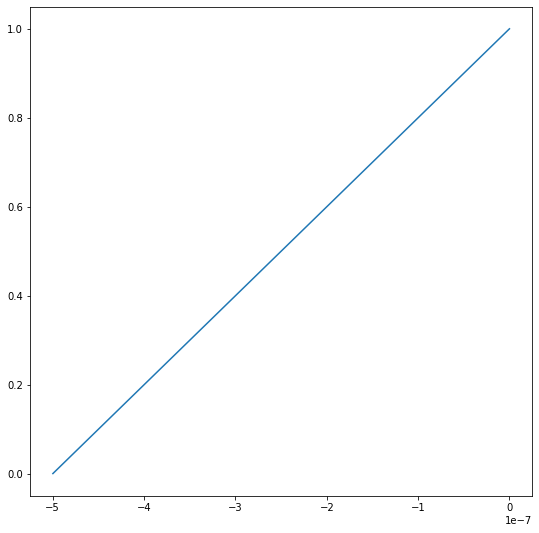

In [103]:
contour_grad(f, 0.25)
# On rencontre de nombreux problèmes: D'abord, le tracé ne se fait que sur de petits morceaux de cellule
# Et il ne semble pas correspondre au tracé souhaité. Une mauvaise implémentation de la méthode de Newton 
# est sûrement à l'origine de nos résultats 
# On essaye donc de l'appliquer de R²-> R² dans la suite

# Deuxième méthode: 
## Avec l'orthogonal du gradient et Newton R²->R²

In [104]:
"""Deuxième essai, dans le même 'style' que le premier: on applique la méthode de Newton, mais cette fois en 2D: R²->R² """
def jacob(h,x,y):
    j=autograd.jacobian
    return np.c_[j(h,0)(x,y), j(h,1)(x,y)]

def Newton_jacob(f, c, a, b, xo, yo, delta):
    """Les deux conditions que l'on souhaite vérifier sont: 
    - Que f(x,y)=c
    - Que le point (x,y) trouvé soit situé à delta du dernier point trouvé sur la ligne de niveau, ie (x-a)²+(y-b)²=delta²"""
    def h(x,y):
        return np.array([f(x,y)-c,(x-a)**2 + (y-b)**2 - delta**2 ])
    def F(X):
        """Cette fonction calcule le (k+1)-ème point à partir du k-ème """
        x, y = X[0], X[1]
        return X - np.dot(np.linalg.inv(jacob(h, x, y)),h(x,y))
    X = np.array([xo, yo]) #C'est le point proche de la ligne de niveau qui nous permet d'initialiser notre suite Xk 
    liste_X = [X]
    while norme(F(liste_X[-1])-liste_X[-1])>10**(-5): 
        # De la même façon on impose que les termes Xk soient suffisamment proches comme condition de terminaison
        liste_X.append(F(liste_X[-1]))
    return liste_X[-1]    



    
def simple_contour_jacob(f, i1=0., j1=0., c=0., delta=0.01):
    k=0
    #On commence par trouver un couple (x,y) sur la ligne de niveau: 
    while find_seed(f, i1 + k*delta, c, j1) is None: 
        k+=1
        if k*delta > 1:
            return [],[]
    x , y = 0. , 0.
    X = [i1+k*delta]
    Y = [find_seed(f, X[0], c, j1)]
    # On trouve ensuite le sens à choisir pour l'orthogonal du gradient qui nous permet de rester dans la cellule
    # Et on s'assure de toujours suivre ce sens grâce à n :
    n=0
    x1 = X[-1]+delta*ortho_grad(f, X[-1], Y[-1])[0][0] 
    y1 = Y[-1]+delta*ortho_grad(f, X[-1], Y[-1])[0][1]
    x2 = X[-1]+delta*ortho_grad(f, X[-1], Y[-1])[1][0] 
    y2 = Y[-1]+delta*ortho_grad(f, X[-1], Y[-1])[1][1]
    if  i1+1>=x1>=i1 and j1+1>=y1>=j1 : 
        x,y = x1, y1
        n=0
    else: 
        x,y = x2, y2
        n=1
    while i1+1>X[-1]>=i1 and j1+1>=Y[-1]>=j1 and len(X)<10000: # Au cas-où la ligne de niveau est entièrement comprise dans une 
        # cellule de taille 1x1, on impose de s'arrêter au bout de 10.000 points
        xn,yn = Newton_jacob(f, c, X[-1], Y[-1], x, y, delta)
        X.append(xn)
        Y.append(yn)
        x = X[-1]+delta*ortho_grad(f, X[-1], Y[-1])[n][0] 
        y = Y[-1]+delta*ortho_grad(f, X[-1], Y[-1])[n][1]
    
    plt.plot(X, Y)

def contour_jacob(f, c=0, xc=[0.,1.], yc=[0.,1.], delta=0.01):
    """Cette fonction permet de 'coller' bout-à-bout les différents fragments de ligne de niveau trouvés
    avec simple_contour_jacob
    NB: On choisit de mettre dans xc et yc les segments entiers à parcourir, et non pas une liste de points desdit segments"""
    n=0
    m=0
    plt.figure(1,figsize=(9,9))
    while xc[0]+n <= xc[-1]:
        m = 0
        while yc[0]+m <= yc[-1]:
            simple_contour_jacob(f, xc[0]+n, yc[0]+m, c, delta)
            m+=1
        n+=1
    plt.show()
    

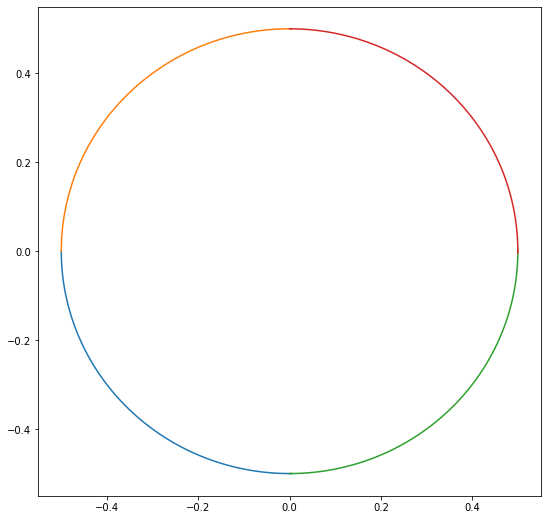

In [105]:
contour_jacob(f, 0.25, [-1.,1.], [-1., 1.])

# L'allure de la courbe de niveau correspond bien cette fois-ci, 
# mais dès que l'expression est à peine plus complexe que x²+y²
# des problèmes d'inversion de la matrice jacobienne se posent 
# et on voit apparaître des 'trous' dans les lignes de niveau
# On va donc s'orienter vers une méthode plus naturelle qui exploite 
# pleinement le principe de find_seed

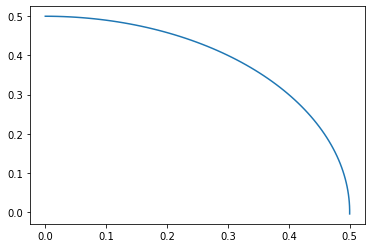

In [106]:
simple_contour_jacob(f, c=0.25)

# Troisème (et dernière) méthode: 
## Avec les hachures 

In [107]:
def find_seed_x(g, x=0, c=0, n=0, eps=2**(-26)):
    " Find_seed qui recherche une graine à y fixé entre x et x+1, pour nous permettre de quadriller notre cellule dans le contour final"
    if (c>g(x+1,n) and c>g(x,n)) or (c<g(x+1,n) and c<g(x,n)):
        return None
    def f(t): 
        return g(t,n)-c
    def dichotomie(f):
        a=x
        b=x+1
        while (b-a)/2 > eps and f(a)*f(b) <= 0:
            m=(a+b)/2
            if f(a)*f(m)<=0: 
                b=m
            else: 
                a=m
        return (a+b)/2
    return dichotomie(f)

def simple_contour_hachures(f, c=0, delta=0.01,xo=0, y_borne=0):
    
    """Sur une cellule [xo,xo+1]x[y_borne,y_borne+1] on applique le find_seed 
    en translatant x de delta jusqu'à sortir de la cellule, puis on complète avec find_seed_x en translatant
    y de delta car pour un x fixé, on pouvait avoir plusieurs graines"""
    
    #Hachures verticales
    X = [xo]
    Y = [find_seed(f, X[0], c, y_borne)]
    while X[-1]<=xo+1:
        X.append(X[-1]+delta)
        Y.append(find_seed(f, X[-1], c, y_borne))
         
    #Hachures horizontales        
    X.append(find_seed_x(f, xo, c, y_borne))
    Y.append(y_borne)
    while Y[-1]<=y_borne+1:
        if (find_seed_x(f, xo, c, Y[-1]+ delta), Y[-1] + delta) not in zip(X,Y): 
            Y.append(Y[-1] + delta)
            X.append(find_seed_x(f, xo, c, Y[-1]))
            
    plt.plot(X, Y,'o', markersize = 2)

def contour(f, c=0, xc=[0.,1.], yc=[0.,1.], delta=0.01):
    
    """On applique simple_contour_hachures sur toutes les cellules de taille 1x1 qui constituent xc*yc
    NB: on choisit comme convention de mettre dans xc et yc les segments entiers qui nous intéressent 
    et non pas une liste de point constituant le segment"""
    
    plt.figure(1, figsize=(9,9))
    cx = 0
    while int(xc[0])+cx<int(xc[-1]):
        cy = 0
        while int(yc[0])+cy<int(yc[-1]):
            simple_contour_hachures(f, c, delta, int(xc[0])+cx, int(yc[0])+cy)
            cy+=1
        cx+=1
    plt.show()

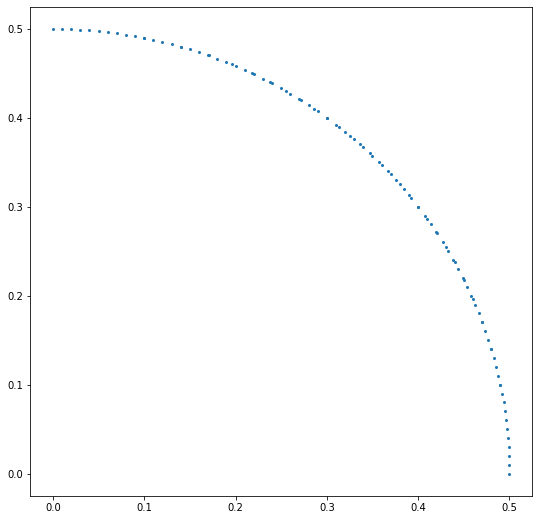

In [108]:
contour(f, 0.25, delta = 0.01)

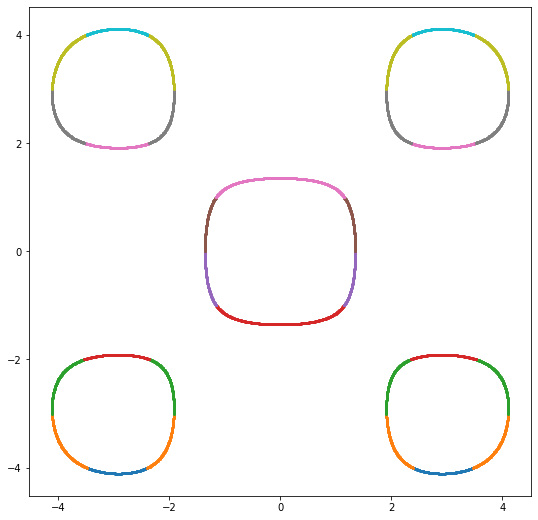

In [110]:
def g(x,y): 
    return  5*cos(x)*cos(y)*exp(-0.04*(x*x+y*y))
contour(g, 1, [-5.,5.], [-5.,5.])
# Les lignes de niveau sont complètes, même pour des 
# fonctions relativement complexes (cf dernière fonction testée avec cos, sin et exp)
# On s'affranchit des contraintes d'inversibilité, et le temps de calcul reste très avantageux